# Hints on Homework 4

## Problem 1

This problem asks you to derive the forward-Euler scheme, realize it, and perform stability analysis. It is quite straightforward.
$$
\frac{u^{n+1}_{j}-u^n_{j}}{\Delta t}=-\nu\frac{u^n_{j+1}-u^n_{j-1}}{2\Delta x}
$$

This gives
$$
u^{n+1}_j=u^n_j-\frac{\mu}{2}(u^n_{j+1}-u^n_{j-1})
$$
where$$
\mu=\frac{\nu\Delta t}{\Delta x}
$$

The von Neumann stability analysis is performed as follows
$$
ge^{ikx_j}=e^{ikx_j}-\mu e^{ikx_j}(e^{ik\Delta x}-e^{-ik\Delta x})
$$
i.e.
$$
g=1-i\mu\sin(k\Delta x)
$$
or $$
|g|=\sqrt{1+\mu^2\sin^2(k\Delta x)}>1
$$
Hence the forward Euler is unconditionally unstable.

## Problem 2

The Lax-Friedrichs scheme for 1d advection equation is given by
$$
u^{n+1}_j=\frac{u^n_{j+1}+u^n_{j-1}}{2}-\frac{\mu}{2}(u^n_{j+1}-u^n_{j-1})
$$

In other words this is
$$
u^{n+1}_j=\frac{1-\mu}{2}u^n_{j+1}+\frac{1+\mu}{2}u^n_{j-1}
$$

Perform von Neumann stability analysis, we have
$$
g=\cos(k\Delta x)-i\mu\sin(k\Delta x)
$$

It is straightforward to see that $|g|<1$ if and only if $0<\mu=\frac{\nu\Delta t}{\Delta x}<1$.

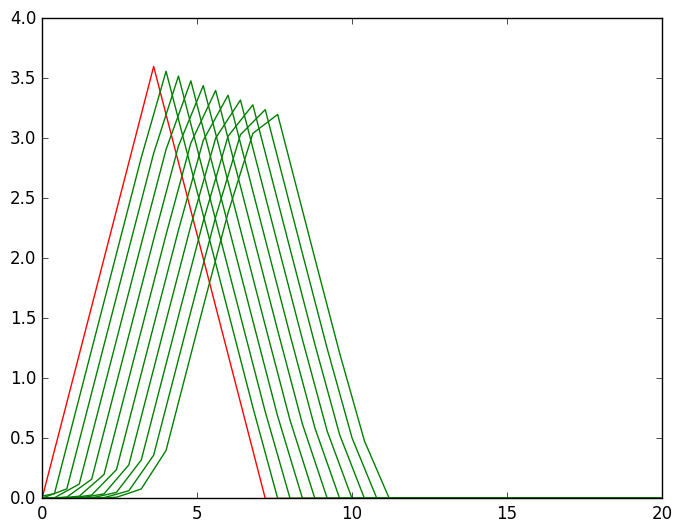

In [3]:
using PyPlot
L = 20
N = 50
mu = 0.9    # Must be less than 1 for stability
x = linspace(0., L, N+1)
init = zeros(N+1)
init[1:10] = [y for y in x[1:10]]
init[11:19] = [7.2-z for z in x[11:19]]
plot(x, init, color = "red")

u = init
diag = (0.5*(1+mu)*ones(N), 0.5*(1-mu)*ones(N))
pos = (-1, 1)
A = spdiagm(diag, pos, N+1, N+1)

for idx = 1:10
    u = A*u
    plot(x, u, color = "green")
    sleep(0.01)
end

## Problem 3

We have
$$
\begin{split}
\frac{\partial}{\partial t}E &=\frac{\partial}{\partial t}\int_{-\infty}^{\infty}\frac{1}{2}u^2\,dx=\int_{\infty}^{\infty}uu_t\,dx\\
& = -c\int_{-\infty}^{\infty}uu_xdx= -c\biggl[\frac{1}{2}u^2\bigg|_{-\infty}^{\infty}\biggr]=0
\end{split}
$$